In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [2]:

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))
true_w.shape

Y = np.matmul(X,true_w) + np.random.randn(N)*0.5
Y

array([ 1.96670315,  7.39230671, -3.94878152, -1.84960032, -4.69797778,
        7.75871536, -4.06744475, -0.50581454, -4.40632491,  2.87667393,
       -1.02486347, -1.29836258,  3.28074369,  4.54694414,  2.25923039,
        3.13642475, -0.03454253,  4.36100822, -1.09057771, -1.18341104,
       -4.22533809,  3.87752661, -1.92871523,  6.00829076,  3.4566192 ,
       -0.0132272 ,  5.10350943, -2.60650561,  5.26491441, -5.22803458,
        6.51656631, -3.46652997, -1.39778707, -4.24838441, -3.55956283,
       -1.49694362, -3.26580059, -4.90408555, -0.40713412,  8.43963855,
       -0.31752767, -1.35282818, -3.86043443,  1.92614766, -3.95458255,
       -1.23750845,  5.11815127, -1.32110416,  3.78122374, -3.63685273])

In [3]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
learning_rate = 0.001
l1 = 0.1 # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?

for t in range(500):
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)
print(w)

[ 8.32593226e-01  5.15843334e-01 -3.62016514e-01 -3.47193175e-03
  5.84241126e-02  1.81525410e-02  4.92024139e-02  1.58434684e-01
  4.66442202e-03 -2.43386023e-02 -4.93700038e-02 -7.31222634e-03
 -9.05095989e-02  7.49924200e-02 -4.45860126e-02 -4.03233657e-02
  6.75326168e-02  1.60070626e-02  4.23864204e-03  3.30361964e-02
 -2.20913288e-02  1.40437168e-05 -5.79472773e-03 -2.56926096e-02
 -6.41143731e-02  3.07068942e-02  4.09239498e-03  7.36828813e-02
  7.52965805e-02 -9.09773870e-02 -1.56386141e-02 -5.72311769e-03
  8.38964087e-02  1.06482550e-01 -4.22517909e-02 -5.00082367e-02
 -7.57839644e-02  9.60482842e-02  2.81124434e-02 -9.77883665e-02
  4.00387492e-02 -2.38427738e-02 -4.43560658e-02 -9.78741883e-03
  9.69053806e-02 -3.83370991e-02  9.41568510e-02 -4.99607304e-02
 -4.39317903e-02 -1.98578377e-02]


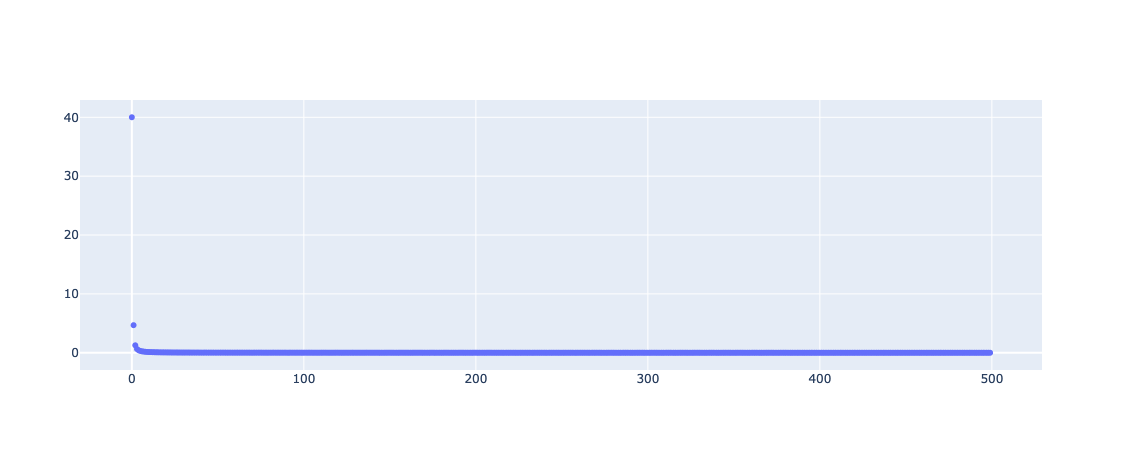

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(costs)),y=costs,mode ='markers'))
fig.show()

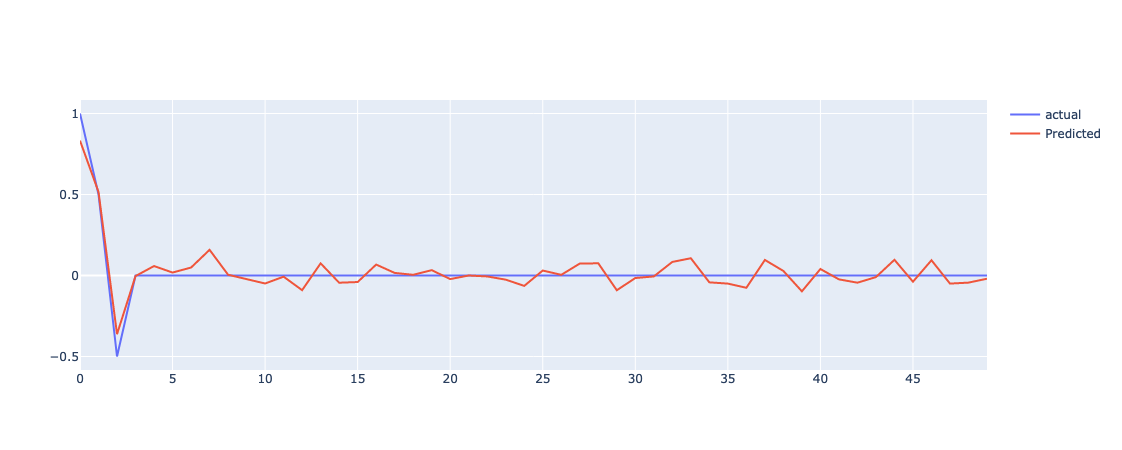

In [5]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(true_w)),y=true_w,mode ='lines',name = 'actual'))
fig.add_trace(go.Scatter(x=np.arange(0,len(w)),y=w,mode ='lines',name = 'Predicted'))
fig.show()